In [5]:
from LSTM_GNN import DataLoader, LSTMoutput
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [3]:
loader = DataLoader('save.csv', 32, 16, 3)
x_train, y_train, x_test, y_test = loader.train_test_split()

model = Sequential()
model.add(LSTM(loader.n_pred*77, batch_input_shape=(loader.n_batch,loader.n_timesteps,77)))
model.add(Dense(loader.n_pred*77//2, activation='relu'))
model.add(Dense(loader.n_pred*77, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=16)

2023-04-05 19:41:31.537668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 0.9714
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 0.9513
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 0.9355
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 0.9183
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 0.8979
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 0.8714
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 0.8386
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 0.8088
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 0.7708
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 0.7335
Epoch 11/100
2/2 [==============================] - 0s 11ms/step - loss: 0.6952
Epoch 12/100
2/2 [==============================] - 0s 11ms/step - loss: 0.6588
Epoch 13/100
2/2 [==============================] 

1/1 [==============================] - 0s 21ms/step


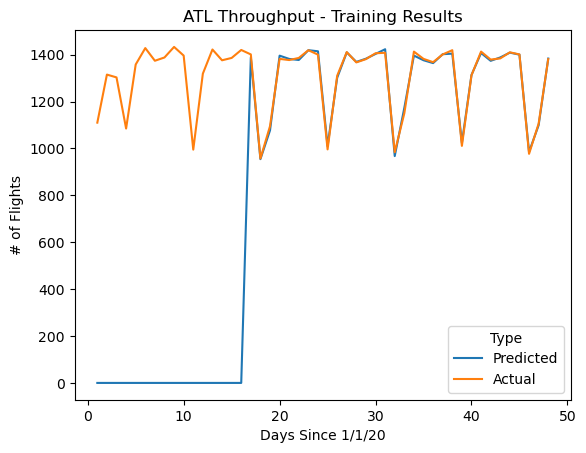

In [8]:
x = pd.read_csv('save.csv').to_numpy()

predicted = model.predict(x_train)
result = LSTMoutput(loader, 16, 32, 2, 0)
result.inverse_transform(predicted)
result.plot(x[2,:16+32])